In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
df = pd.read_csv('homeprices_banglore (1).csv')
df.sample(5)

,area,bedrooms,price
13,1100,2,40.0
7,3300,4,155.0
8,1310,3,50.0
9,3700,5,167.0
5,1170,2,38.0


In [38]:
from sklearn import preprocessing

In [39]:
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()

In [40]:
scaled_x=sx.fit_transform(df.drop(['price'],axis='columns'))
scaled_y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [41]:
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [42]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [43]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [44]:
np.random.permutation(20)

array([14, 13, 11,  8,  9,  7,  4,  3, 19, 10,  2, 16,  6, 17, 18,  0, 12,
        1, 15,  5])

In [47]:
def mini_batch_gradient(X,y_true,epochs=100,batch_size=5,learning_rate=0.01):
    
    number_of_features=X.shape[1]
    w=np.ones(shape=(number_of_features))
    b=0
    total_sample=X.shape[0]
    
    if batch_size > total_sample:
        batch_size=total_sample
        
    cost_list=[]
    epoch_list=[]
    
    num_batch = int(total_sample/batch_size)
    
    for i in range(epochs):
        random_indices=np.random.permutation(total_sample)
        x_temp=X[random_indices]
        y_temp=y_true[random_indices]
        
        for j in range(0,total_sample,batch_size):
            Xj = x_temp[j:j+batch_size]
            yj = y_temp[j:j+batch_size]
            y_predicted = np.dot(w,Xj.T)+b
            
            w_grad=-(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad=-(2/len(Xj))*np.sum(yj-y_predicted)
            
            w=w-learning_rate*w_grad
            b=b-learning_rate*b_grad
            
            cost = np.mean(np.square(yj-y_predicted))
            
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w,b,cost,cost_list,epoch_list



In [48]:
w,b,cost,cost_list,epoch_list=mini_batch_gradient(scaled_x,scaled_y.reshape(scaled_y.shape[0],),epochs=120,batch_size=5)


In [49]:
w,b,cost

(array([0.7100477 , 0.67803008]), -0.23351575392530843, 0.002115500272752091)

In [50]:
cost_list,epoch_list

([0.1420520399392822,
  0.03702741854027396,
  0.007009741727047758,
  0.021592729364987684,
  0.004353181471715541,
  0.005667337624254307,
  0.014008612310678672,
  0.0023989576580394564,
  0.010217481186719283,
  0.0065170610874788855,
  0.014575460231571278,
  0.006899530028561069],
 [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110])

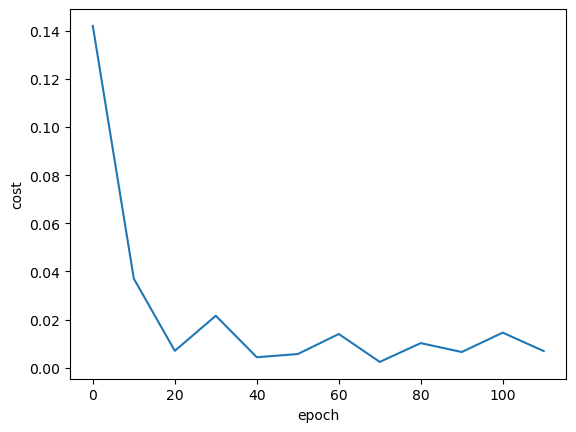

In [51]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [52]:
def predict(area,bedrooms,w,b):
    scaled_x=sx.transform([[area,bedrooms]])[0]
    scaled_price = w[0]*scaled_x[0] + w[1] * scaled_x[1] + b
    
    return sy.inverse_transform([[scaled_price]])[0][0]

In [53]:
predict(2600,4,w,b)

128.62301915293293